In [ ]:
import matplotlib.pyplot as plt

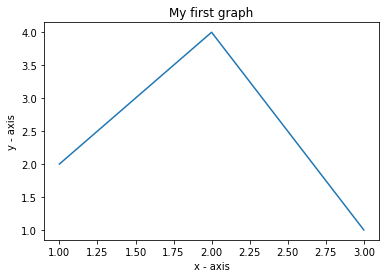

In [ ]:
x = [1, 2, 3]
y = [2, 4, 1]

plt.plot(x, y)

plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.title('My first graph')

plt.show()

In [ ]:
import networkx as nx
import numpy as np

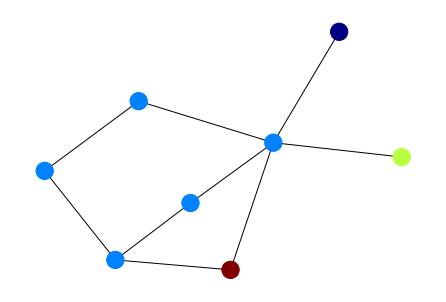

In [ ]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'), ('B', 'H'), ('B','G'), ('B', 'F'), ('C','G')])
val_map = {'A': 1.0,
           'D': 0.5714285714,
           'H': 0.0
          }
values = [val_map.get(node, 0.25) for node in G.nodes()]

node_labels = {node: node for node in G.nodes()}

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

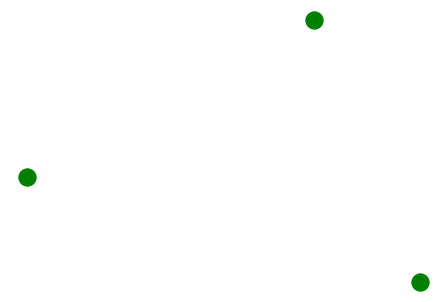

In [ ]:
F = nx.Graph()
F.add_node(1)
F.add_nodes_from([2, 3])
nx.draw(F, cmap = plt.get_cmap('jet'), node_color = 'green')
plt.show()

In [ ]:
F.nodes()

NodeView((1, 2, 3))

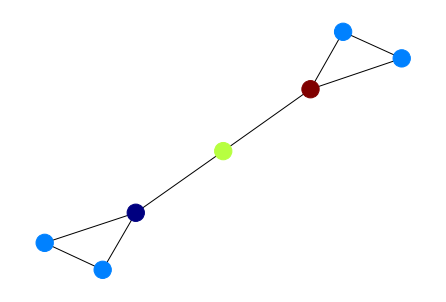

In [ ]:
G = nx.Graph()
G.add_edges_from([('0', '1'), ('0', '2'), ('2', '1'), ('2', '3'), ('3', '4'), ('4', '5'), ('5','6'), ('6', '4')])
val_map = { '2': 1.0,
            '3': 0.5714285714,
            '4': 0.0
          }
values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

# Articulation points algorithm

Entrer le nombre de sommets du graphes >>  12
Entrer le nombre des arcs du graphe >> 12
Ajouter un arc entre : 0 1
Ajouter un arc entre : 0 2
Ajouter un arc entre : 2 1
Ajouter un arc entre : 2 3
Ajouter un arc entre : 3 4
Ajouter un arc entre : 4 5
Ajouter un arc entre : 5 6
Ajouter un arc entre : 6 4
Ajouter un arc entre : 7 8
Ajouter un arc entre : 8 9
Ajouter un arc entre : 9 10
Ajouter un arc entre : 10 11

Articulation points in this graph 
2  3  4  8  9  10  

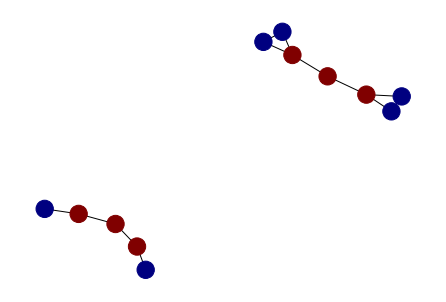

In [ ]:
from collections import defaultdict

# This class represents an undirected graph
# using adjacency list representation
val_map = {}
class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = defaultdict(list) # default dictionary to store graph
		self.Time = 0

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)
		self.graph[v].append(u)

	'''A recursive function that find articulation points
	using DFS traversal
	u --> The vertex to be visited next
	visited[] --> keeps track of visited vertices
	disc[] --> Stores discovery times of visited vertices
	parent[] --> Stores parent vertices in DFS tree
	ap[] --> Store articulation points'''
	def APUtil(self, u, visited, ap, parent, low, disc):

		# Count of children in current node
		children = 0

		# Mark the current node as visited and print it
		visited[u]= True

		# Initialize discovery time and low value
		disc[u] = self.Time
		low[u] = self.Time
		self.Time += 1

		# Recur for all the vertices adjacent to this vertex
		for v in self.graph[u]:
			# If v is not visited yet, then make it a child of u
			# in DFS tree and recur for it
			if visited[v] == False :
				parent[v] = u
				children += 1
				self.APUtil(v, visited, ap, parent, low, disc)

				# Check if the subtree rooted with v has a connection to
				# one of the ancestors of u
				low[u] = min(low[u], low[v])

				# u is an articulation point in following cases
				# (1) u is root of DFS tree and has two or more children.
				if parent[u] == -1 and children > 1:
					ap[u] = True

				#(2) If u is not root and low value of one of its child is more
				# than discovery value of u.
				if parent[u] != -1 and low[v] >= disc[u]:
					ap[u] = True

				# Update low value of u for parent function calls
			elif v != parent[u]:
				low[u] = min(low[u], disc[v])


	# The function to do DFS traversal. It uses recursive APUtil()
	def AP(self):

		# Mark all the vertices as not visited
		# and Initialize parent and visited,
		# and ap(articulation point) arrays
		visited = [False] * (self.V)
		disc = [float("Inf")] * (self.V)
		low = [float("Inf")] * (self.V)
		parent = [-1] * (self.V)
		ap = [False] * (self.V) # To store articulation points

		# Call the recursive helper function
		# to find articulation points
		# in DFS tree rooted with vertex 'i'
		for i in range(self.V):
			if visited[i] == False:
				self.APUtil(i, visited, ap, parent, low, disc)

		for index, value in enumerate (ap):
			if value == True: print(index, end="  ");val_map[str(index)] = 0.5714285714

# This code is contributed by Neelam Yadav

#input validation
v = int(input("Entrer le nombre de sommets du graphes >>  "))
e = int(input("Entrer le nombre des arcs du graphe >> "))
elet = []
g = Graph(v)
edges = []
for i in range(e):
	elet = list(map(int, input("Ajouter un arc entre : ").strip().split()))[:2]
	if  elet[0] < v and elet[1] < v :
		g.addEdge(elet[0], elet[1])
		edges.append((str(elet[0]),str(elet[1])))

print("\nArticulation points in this graph ")
g.AP()

H = nx.Graph()
H.add_edges_from(edges)
values = [val_map.get(node, 0.25) for node in H.nodes()]
nx.draw(H, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()















